In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings 
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)
import plotly.express as px
import plotly.graph_objects as go

import datetime as dt
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('C:/Users/user/OneDrive/Desktop/Data Maturity Workshop/DATASET/Cleaned_Hotel.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,month_year,total_guests
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,1/7/2015,2015-07-01,2015-07,2.0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,1/7/2015,2015-07-01,2015-07,2.0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2/7/2015,2015-07-01,2015-07,1.0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2/7/2015,2015-07-01,2015-07,1.0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,3/7/2015,2015-07-01,2015-07,2.0


Univariate Analysis

Country

In [27]:
df.stb.freq(['country'], cum_cols = False).head(10)

,country,count,percent
0,PRT,27311,31.388346
1,GBR,10409,11.962993
2,FRA,8798,10.111481
3,ESP,7230,8.309390
4,DEU,5372,6.174003
5,ITA,3052,3.507643
6,IRL,3011,3.460522
7,BEL,2065,2.373290
8,BRA,1983,2.279048
9,NLD,1901,2.184806


In [28]:
def country(row):
    if (row['country'] == 'PRT'):
        return 'Portugal'
    else :
        return 'Other Country'
    
df['booking_location'] = df.apply(country, axis = 1)

df.stb.freq(['booking_location'], cum_cols=False)

# the goals of creating a new column here so later on we can see how booking locati

,booking_location,count,percent
0,Other Country,59699,68.611654
1,Portugal,27311,31.388346


Booking Changes

In [ ]:
df.stb.freq(['booking_changes'], cum_cols = False)

# almost 85 % of the customers never change their booking 
# since there are many values of this booking changes column 
# we will group it in to does the booking ever been changes or not 

In [29]:
def changes(row):
    if (row['booking_changes'] == 0):
        return 0
    else :
        return 1

df['is_booking_changes'] = df.apply(changes, axis = 1)
df.stb.freq(['is_booking_changes'], cum_cols = False)

,is_booking_changes,count,percent
0,0,71262,81.900931
1,1,15748,18.099069


Lead Time

In [30]:
lead_time_months = df['lead_time'] // 30
lead_time_months.value_counts() / len(df)
df['lead_time_month'] = df['lead_time'] // 30

In [31]:
df.stb.freq(['lead_time_month'], cum_cols = False)

,lead_time_month,count,percent
0,0,33953,39.021951
1,1,13469,15.479830
2,2,9461,10.873463
3,3,7269,8.354212
4,4,5712,6.564763
5,5,5281,6.069417
6,6,3776,4.339731
7,7,2751,3.161706
8,8,1731,1.989427
9,9,1302,1.496380


Multivariate Analysis

1. Hotel Type and Cancellation 

In [32]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))


In [33]:
pd.crosstab(df['hotel'], df['is_canceled'], normalize = 'index')

df.stb.freq(['hotel'], cum_cols = False)

display_side_by_side([pd.crosstab(df['hotel'], df['is_canceled'], normalize = 'index'), df.stb.freq(['hotel'], cum_cols = False)],['Cancelation', 'Number of Bookings'])


Lead Time = Higher chances of cancellations?

In [34]:
pd.crosstab(df['lead_time_month'], df['is_canceled'], normalize = 'index')

# from the crosstab below we see that leadtime in general has a linear effect towards cancellation 
# it means in general that the longer lead time has a higher cancellation rate compared to the shorter one 

# bookings that has more than 7 months lead time are more likely to be canceled compared to confirmed 

is_canceled,0,1
lead_time_month,,
0,0.838070,0.161930
1,0.685203,0.314797
2,0.670225,0.329775
3,0.656349,0.343651
4,0.642332,0.357668
5,0.654043,0.345957
6,0.632415,0.367585
7,0.643766,0.356234
8,0.575390,0.424610


Arrival Date Month and Cancellation

In [ ]:
pd.crosstab(df['arrival_date_month'], df['is_canceled'], normalize = 'index').sort_values(1, ascending = False)

# there's definitely fluctuation in term of arrival month and cancellation 
# with the highest cancellation month are in 
# 1. June (41.5 %)
# 2. April (40.8 %)
# 3. May (39. 6 %)

# those months are summer months 
# according to :
# https://www.timeanddate.com/holidays/portugal/2017

# those 3 months combined to total of 18 days of holidays and observance in 2017
# 15 days in 2016 
# 14 days in 2015 

# plus june is a school holiday in portugal

# source : https://www.expatica.com/pt/education/children-education/school-holidays-in-portugal-69027/#:~:text=Summer%20break%3A%20taken%20between%209,differ%20depending%20on%20age%20group.

# that's might be the reason why on those month cancelation is higher compared to

Deposit Type and Cancellation
- majority of the booking in this dataset has no deposit policy this gave flexibilty to the customers to cancel with ease whenever based on their liking without having to deal with any loss, however there are implication from customers who cancel

In [35]:
pd.crosstab(df['deposit_type'], df['is_canceled'], normalize = 'index')


# as we can see that non refundable deposit has the highest cancellation rate among all deposit type 
# so the hotel somehow already protect themselves from losing out on revenue by implementing the non refund deposit 

# we will look into this deeper why does Non Refund policy have the highest cancellation rate among all bookings ?
# 

is_canceled,0,1
deposit_type,,
No Deposit,0.733084,0.266916
Non Refund,0.053038,0.946962
Refundable,0.757009,0.242991


Previously cancelled & cancellation

In [36]:
pd.crosstab(df['previous_cancellations'], df['is_canceled'], normalize = 'index')

# booking that's previously cancelled are 92% will be cancelled again
# this tell us that booking that's been cancelled are more likely to be cancelled again

# insight: 
# we could implement (prevention from this kind of booking) some of the Big OTA has this product that allow you to prevent
# booking from guest that's more likely to cancel 

is_canceled,0,1
previous_cancellations,,
0,0.732969,0.267031
1,0.238774,0.761226
2,0.690909,0.309091
3,0.737705,0.262295
4,0.800000,0.200000
5,0.894737,0.105263
6,0.882353,0.117647
11,0.925926,0.074074
13,0.250000,0.750000


Data Visualization

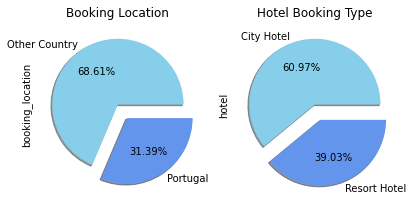

In [37]:
fig= plt.figure(figsize = (10, 5))
fig.patch.set_facecolor('white')
plt.subplot(1,3,2)
colors = ("skyblue", "cornflowerblue")
df['booking_location'].value_counts().plot.pie(explode = [0, 0.25], 
                                               autopct = '%1.2f%%',
                                               shadow = True,
                                               colors=colors
                                               )
plt.title('Booking Location')
plt.rcParams['text.color'] = 'black'

plt.subplot(1,3,3)
df['hotel'].value_counts().plot.pie(explode = [0, 0.25],
                                 autopct = '%1.2f%%',
                                 shadow = True,
                                 colors=colors)
plt.title('Hotel Booking Type')

plt.show()

# we see that more than half of the booking were from outside of the portugal while 41.11 % are from Portugal

Deposit Type

Text(0.5, 1.0, 'Deposit Type')

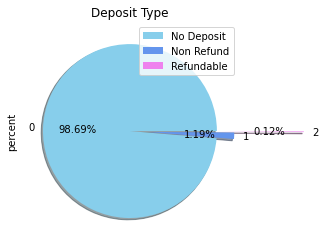

In [38]:
deposit_type = df.stb.freq(['deposit_type'],cum_cols = False)
colors = ("skyblue", "cornflowerblue","violet")


deposit_type['percent'].plot.pie(explode = [0, 0.2, 1], 
                                               autopct = '%1.2f%%',
                                               shadow = True,
                                               colors=colors
                                               )                                              
plt.legend(deposit_type['deposit_type'])
plt.title('Deposit Type')

Previous Cancellations

In [39]:
df.stb.freq(['previous_cancellations'], cum_cols = False)

# almost 95% of the booking never been cancelled before in this data set
# we will group this into booking that's never been cancelled or have been cancelled before 

,previous_cancellations,count,percent
0,0,85331,98.070337
1,1,1403,1.612458
2,2,110,0.126422
3,3,61,0.070107
4,4,30,0.034479
5,11,27,0.031031
6,5,19,0.021837
7,6,17,0.019538
8,13,4,0.004597
9,25,2,0.002299


In [40]:
def cancellation(row):
    if (row['previous_cancellations'] == 0):
        return 0
    else :
        return 1

df['is_previously_cancelled'] = df.apply(cancellation, axis = 1)
df.stb.freq(['is_previously_cancelled'], cum_cols = False)

,is_previously_cancelled,count,percent
0,0,85331,98.070337
1,1,1679,1.929663


Map Of the Booking

In [41]:
country_data =  df.stb.freq(['country'], cum_cols = False)

guest_map = px.choropleth(country_data,
                    locations=country_data['country'],
                    color=country_data["count"], 
                    hover_name=country_data['country'], 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Booking Map")
guest_map.show()

Arrival Date Month

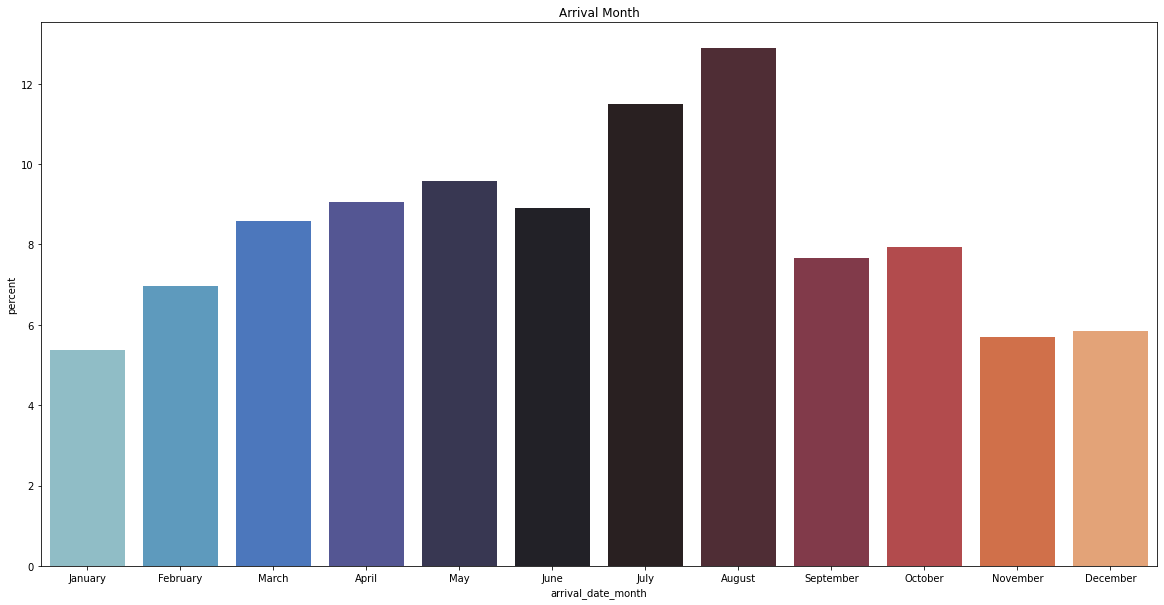

In [42]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

arrival = df.stb.freq(['arrival_date_month'], cum_cols = False)
arrival['arrival_date_month'] = pd.Categorical(arrival['arrival_date_month'], categories=order, ordered=True)
arrival
plt.figure(figsize = (20, 10))
plt.title("Arrival Month")
sns.barplot(x = 'arrival_date_month', y='percent', data = arrival, order = order, palette = 'icefire')
plt.show()
# we see from here that percentage of the arrival that august has the highest total booking 
# why is that :
# according to :
# https://www.expatica.com/pt/education/children-education/school-holidays-in-portugal-69027/#:~:text=Summer%20break%3A%20taken%20between%209,differ%20depending%20on%20age%20group.
# summer holiday in portugal will taken between 9 june to september 12 in 2021
# we are assuming the summer holiday in 2015 - 2017 happen around the same day 
# that might be the reason why booking for that arrival is higher  especially in august 

# however in this dataset we see that the month of august and july appear 3 times while the rest of the month appear
# for only 2 times this definitely have an effect on the number of percentage


In [49]:
hotel_month_year =  pd.crosstab(df['arrival_date_year'], df['hotel'], normalize = 'columns')

fig = go.Figure(data=[
    go.Bar(name='City Hotel', x=hotel_month_year.index, y=hotel_month_year['City Hotel'],width = 0.3),
    go.Bar(name='Resort Hotel', x=hotel_month_year.index, y=hotel_month_year['Resort Hotel'],width = 0.3)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

Arrival Month Year for Each Hotel & ADR

In [44]:
hotel_month_year =  pd.crosstab(df['month_year'], df['hotel'], normalize = 'columns')

fig = go.Figure(data=[
    go.Bar(name='City Hotel', x=hotel_month_year.index, y=hotel_month_year['City Hotel']),
    go.Bar(name='Resort Hotel', x=hotel_month_year.index, y=hotel_month_year['Resort Hotel'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

# we see a different trend for 2 different hotels 

# for resort hotels : 

# resort hotel in general out perfrom city hotel during winter period (November, December ,January)
# and why is so :
# our assumption is resort hotels generally offer more attraction compared to the city hotel
# while city hotel offered the possibility of exploring around hence it's located around the city 
# since the winter weather is not the nicest weather to go around, maybe that's why resort hotel is more preferable during
# the winter 

#2nd reason : 

# city hotel and resort hotel here are located in 2 different region 
# resort hotel located in algarve 
# while city hotel located in Lisbon 

# according to :
#https://www.algarveuncovered.com/out-of-season/, in algrave region the weather is somewhere (17 - 20) Celcius during the winter
# which still kind of warm 

# while in lisbon the weather tend to get cooler between 
#8 - 15 c in the winter this weather might be ther reason the booking during the winter for city hotel is way less 
# compared to the booking during the summer / warmer months 

In [45]:
month_year_adr =  pd.crosstab(df['month_year'], 'Median Price', values = df['adr'], aggfunc = 'median')

fig = px.line(month_year_adr, x = month_year_adr.index, y ='Median Price', title = 'Median ADR')
fig.show()

# the median adr in general follow the number of the booking as we can see during the low period (november, december, january)
# the median adr will goes down as well
# while during the month where the hotel is busy (summer)(may, june, july)
# the median adr will tend to goes up as well 

Number Of Cancellation Towards the number of booking

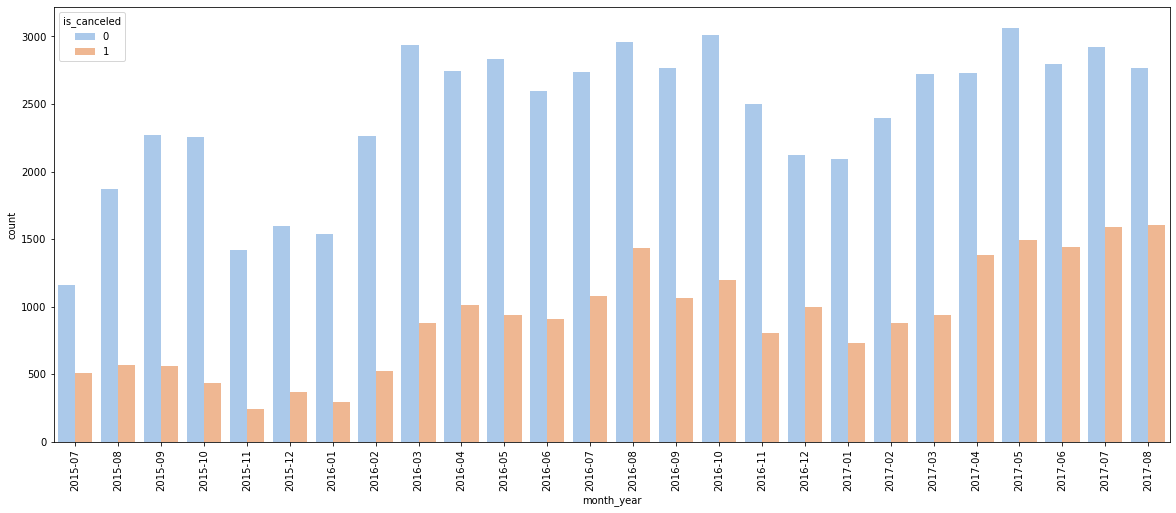

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'month_year' , hue = 'is_canceled', data = df ,  palette = 'pastel')
plt.xticks(rotation = 90)

plt.show()

# as we can see from the chart below the number of cancellation generally goes up as the number of booking goes up
# however it doesn't seem number of cancellation has a linear effect towards number of booking 
# as we can see that there are certain month that has a higher percentage of confirmed booking compared to other months 

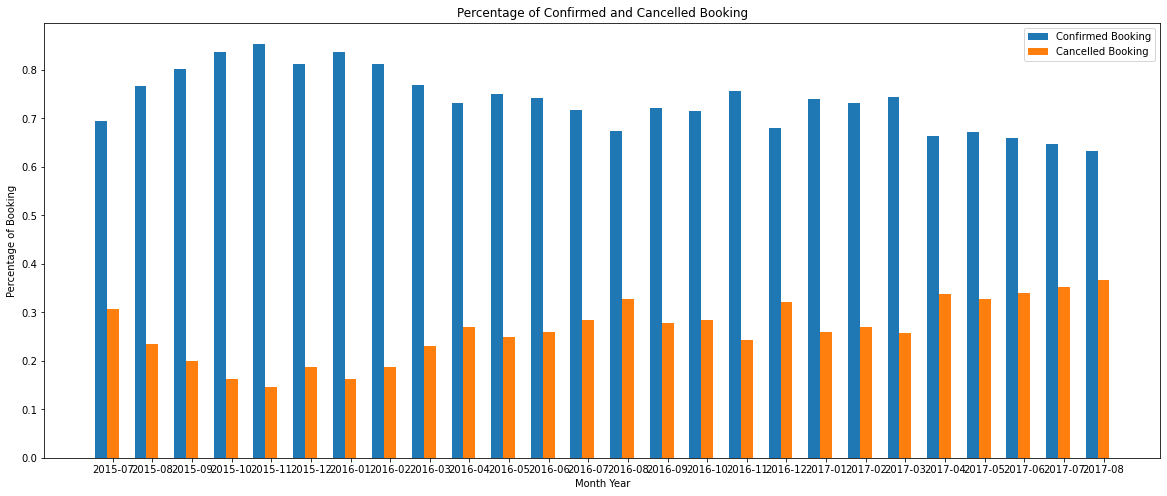

In [ ]:
step = np.arange(0,26)
month_year_cancellation=pd.crosstab(df['month_year'], df['is_canceled'], normalize = 'index')

fig, ax = plt.subplots(figsize = (20, 8))


ax.bar(step - 0.3, month_year_cancellation[0], width = 0.3)
ax.bar(step, month_year_cancellation[1], width = 0.3)
ax.set_xticks(step)
ax.set_xticklabels(month_year_cancellation.index)
plt.legend(['Confirmed Booking', 'Cancelled Booking'])
plt.xlabel('Month Year')
plt.ylabel ('Percentage of Booking')
plt.title('Percentage of Confirmed and Cancelled Booking')

plt.show()

# look at the table below and see the month of November 2015 and January 2016, majority of the month has a cancellation rate around
# 30 to 40 percent however these two months are the only months with cancellation rate below 30 % 
# and why is so ? 
# is it just because the randomness or is there any explanation behind it 
# hypothesis testing needed for this ??? 

Leadtime and cancellation

In [ ]:
lead_time_canceled =  pd.crosstab(df['lead_time_month'], df['is_canceled'], normalize = 'index')
lead_time_canceled_deposit = pd.crosstab(df['lead_time_month'], df['deposit_type'], normalize = 'index')

fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=lead_time_canceled.index, y=lead_time_canceled[0]),
    go.Bar(name='Cancelled Booking', x=lead_time_canceled.index, y=lead_time_canceled[1],marker_color = 'crimson')
])
# Change the bar mode
fig.update_layout(barmode='group', title = 'Percentage of Confirmed Booking and Cancelled Booking per Lead Time Month',
                 yaxis=dict(
                 title='Percentage',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Lead Time Month',
                 titlefont_size=16,
                 tickfont_size=14,))
fig.show()


# we can see from the graph booking that has lead time more than 7 months are more likely to be canceled than to be confirmed
# in general the longer the lead time the higher the chances the booking to be cancelled compared to be confirmed 

In [ ]:
pd.crosstab(df['lead_time_month'], df['is_canceled']).sort_index(ascending=True)[12::]

is_canceled,0,1
lead_time_month,,
12,201,69
13,77,49
14,45,30
15,66,49
16,7,14
17,4,13
18,17,8
19,0,8
20,0,12


Median Lead Time for Cancelled and Confirmed Booking Each Month

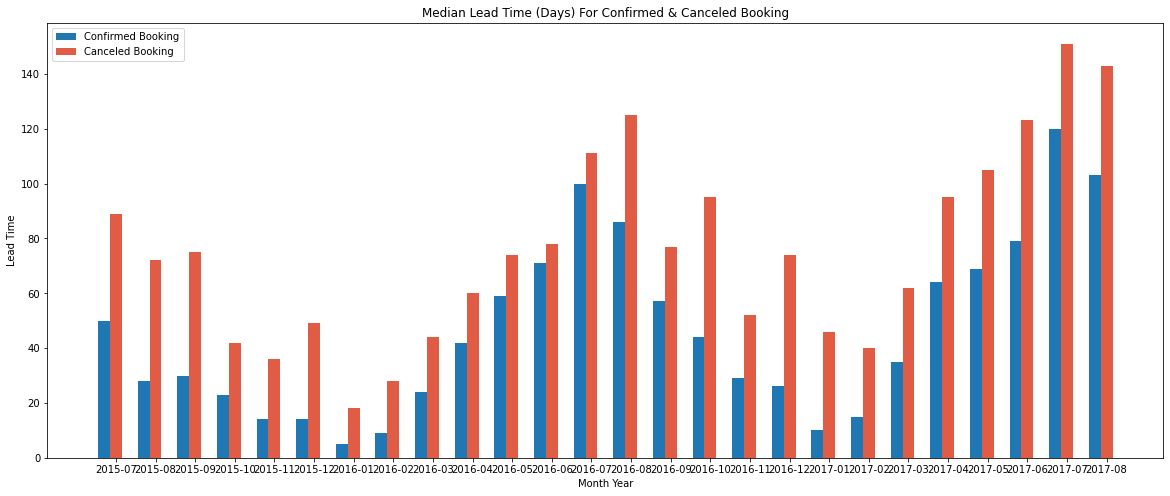

In [ ]:
lead_time_booking =  pd.crosstab(df['month_year'], df['is_canceled'], values = df['lead_time'], aggfunc = 'median')

step2 = np.arange(0,26)

fig, ax = plt.subplots(figsize = (20, 8))

ax.bar(step2 - 0.3, lead_time_booking[0], width = 0.3)
ax.bar(step2, lead_time_booking[1], width = 0.3, color = '#E05C45')
ax.set_xticks(step2)
ax.set_xticklabels(lead_time_booking.index)
plt.xlabel('Month Year')
plt.ylabel('Lead Time')
plt.title('Median Lead Time (Days) For Confirmed & Canceled Booking')
plt.legend(['Confirmed Booking', 'Canceled Booking'])
plt.show()

# we definitely see a pattern here for each month 


# December 2015 has the lowest median lead time for canceled and confirmed booking  
# for booking with arrival date in the spring & summer (march - august) in general have a longer median lead time compared to
# booking for fall - winter season (September - December)
# For each year September tend to have the highest median lead time for canceled booking 
# (we couldn't find any specific information why september in general has the highest lead time for canceled booking for the
# past 2 years)

# lead time for canceled booking and confirmed booking are somewhat positively correlated 
# means month that has a low lead time for confirmed booking usually has a low leadtime for canceled booking as well

# with month with high lead time of confirmed booking usually has a high lead time for their canceled booking

# in general canceled booking lead time always higher compared to confirmed bookin

Why Does Local Booking are way more likely to be canceled compared to the international booking

In [ ]:
booking_location_cancelled =  pd.crosstab(df['booking_location'],df['is_previously_cancelled'],normalize= 'index')

fig = go.Figure(data=[
    go.Bar(name='Previously Not Cancelled', x=booking_location_cancelled.index, y=booking_location_cancelled[0]),
    go.Bar(name='Previously  Cancelled', x=booking_location_cancelled.index, y=booking_location_cancelled[1],marker_color = 'crimson')])

fig.update_layout(barmode='group', title = 'Percentage of Previously Cancellation',
                 yaxis=dict(
                 title='Percentage of previous booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Booking Location',
                 titlefont_size=16,
                 tickfont_size=14,))

fig.show()

# our first analysis why local booking has higher cancellation rate compared to international booking is because 
# the higher previously cancelled booking rate in the local booking

# fromo our analysis that 92% of booking that's previously cancelled will be cancelled again 
# this might have an effect why local booking has higher cancellation rate compared to international booking

In [ ]:
booking_location_deposit = pd.crosstab(df['booking_location'],df['deposit_type'],normalize= 'index')

fig = go.Figure(data=[
    go.Bar(name='No Deposit', x=booking_location_deposit.index, y=booking_location_deposit['No Deposit']),
    go.Bar(name='Non Refund', x=booking_location_deposit.index, y=booking_location_deposit['Non Refund']),
    go.Bar(name='Refundable', x=booking_location_deposit.index, y=booking_location_deposit['Refundable'])])


fig.update_layout(barmode='group', title = 'Percentage of Deposit for each booking location',
                 yaxis=dict(
                 title='Percentage of Deposit Type (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Booking Location',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()


# second reason is why local booking has more cancellation compared to international booking is because 
# there are more non refunable deposit booking for local booking compared to international booking
# from our past analysis we see that 99% of non refund booking were cancelled this might be the second reason why 
# local booking has more cancellation compared to international booking

# almost all international booking are made without deposit 99.2 %

In [ ]:
deposit_cancellation = pd.crosstab(df['deposit_type'],df['is_canceled'])

fig = go.Figure(data=[
    #go.Bar(name='Confirmed Booking', x=deposit_cancellation.index, y=deposit_cancellation[0]),
    go.Bar(name='Canceled Booking', x=deposit_cancellation.index, y=deposit_cancellation[1])])


fig.update_layout(barmode='group', title = 'Number of Cancellation for each Deposit Type',
                 yaxis=dict(
                 title='Count Of Bookings',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Deposit Type',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()


# we see that almost every non refund booking are most likely to be cancelled compared to other deposit ty[e]
# while the other 2 deposit type

Previously Cancellation & Cancellation

In [ ]:
previously_cancelled =pd.crosstab(df['is_previously_cancelled'], df['is_canceled'], normalize = 'index')


fig = go.Figure(data=[
    go.Bar(name='Confirmed Booking', x=previously_cancelled.index, y=previously_cancelled[0], width = 0.2),
    go.Bar(name='Cancelled Booking', x=previously_cancelled.index, y=previously_cancelled[1],width = 0.2)])


fig.update_layout(barmode='group', title = 'Percentage of Previously Cancelled Booking',
                 yaxis=dict(
                 title='Percentage of Booking (%)',
                 titlefont_size=16,
                 tickfont_size=14,)
                ,xaxis=dict(
                 title='Previously Cancelled',
                 titlefont_size=16,
                 tickfont_size=14,)) 
fig.show()

# we see from the data below we see that almost 92% of booking that has been cancelled will be cancelled again

# suggestion : all cancelled booking before should be on non refund deposit on the future booking because 
# we see that 92 % of past cancelled booking will cancel again by leveraging the policy we will be able to protect the hotel
# from losing revenue 